## CNN model for hand written digit data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape ,y_test.shape

((60000, 28, 28), (10000,))

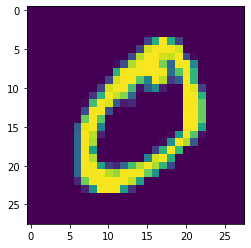

In [4]:
plt.imshow(X_train[1])

In [5]:
y_train[1]

0

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape
X_test = X_test.reshape(-1,28,28,1)
X_test.shape


(10000, 28, 28, 1)

In [14]:
model = keras.Sequential([
    
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1565 - accuracy: 0.9540
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0538 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0167 - accuracy: 0.9947


In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9852


[0.04995890334248543, 0.9851999878883362]

In [16]:
y_p = model.predict(X_test)

In [17]:
y_p[1]

array([2.80592442e-02, 7.36482501e-01, 9.99998987e-01, 1.27187371e-03,
       8.52075459e-07, 4.00063664e-06, 3.87374163e-02, 1.08666005e-04,
       5.05119562e-04, 1.01429076e-04], dtype=float32)

In [18]:
predicted = []
for i in range(len(y_p)):
    predicted.append(np.argmax(y_p[i]))

In [19]:
predicted[:5]

[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

